<a href="https://colab.research.google.com/github/Astra-Stark/Stock_Prediction_LInear_Regression-/blob/main/Stock_prediction_Linear_Regression_code_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yFinance
# Yfinance is a Python library that provides convenient access to the Yahoo Finance API.
# It allows users to download historical stock data, get real-time stock quotes, and obtain information about stock symbols,
# such as company name and stock exchange.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
tesla = yf.Ticker("TSLA")
#ticker contains information about the Tesla stock like its name, value and daily proce fluctuations

In [ ]:
tesla_hist = tesla.history(period = "max")

The code is using the history() method from the pandas_datareader module to get the historical stock price data of Tesla Inc.

The period argument is set to "max", which means that the method will retrieve the historical data for the maximum time period available. In this case, it will retrieve the historical data from the earliest available date up to the present.

After executing this code, the tesla_hist variable will contain a pandas DataFrame object with the historical stock price data of Tesla. The DataFrame will have columns for the date, opening price, high price, low price, closing price, and trading volume for each day.

In [ ]:
import pandas as pd

In [ ]:
tesla_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
tesla_hist.shape

(3244, 7)

calling the head() method with an argument of 5 on the tesla_hist DataFrame will show the first five rows of the DataFrame.

Each row will represent a day of trading for Tesla

<Axes: xlabel='Date'>

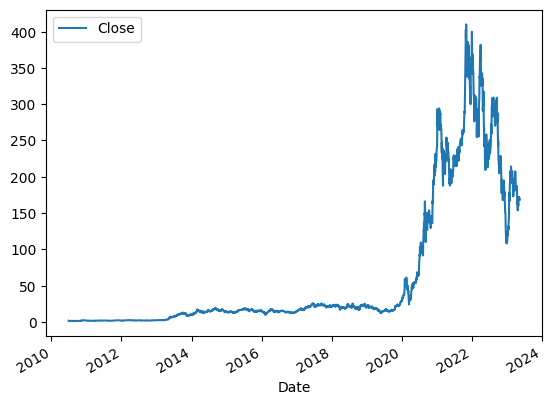

In [ ]:
tesla_hist.plot.line(y="Close", use_index=True)

The y argument is set to "Close", which means that the plot will display the closing prices of Tesla. The use_index argument is set to True, which means that the index of the DataFrame will be used as the x-axis for the plot.

In more detail, the plot() method creates a plot of the DataFrame, with the x-axis representing the index of the DataFrame (which should be dates in this case), and the y-axis representing the specified column (Close in this case). Since plot() is called with line as an argument, it creates a line plot.

Therefore, the resulting plot will show the closing prices of Tesla over time as a continuous line. The x-axis will represent the dates, and the y-axis will represent the closing prices of Tesla. The plot will show the changes in the closing prices of Tesla over time, which can help visualize the trends in the stock prices and identify any patterns or irregularities in the data.

In [ ]:
# Ensure we know the actual closing price
data = tesla_hist[["Close"]]
data = data.rename(columns = {'Close':'Actual_Close'})

The code data = tesla_hist[["Close"]] is creating a new DataFrame data that contains only the "Close" column from the tesla_hist DataFrame. The double brackets [[ and ]] are used to select a column as a DataFrame instead of a Series.

The code data = data.rename(columns = {'Close':'Actual_Close'}) is then renaming the column label from "Close" to "Actual_Close" using the rename() method from the pandas module. This means that the new DataFrame data will have only one column named "Actual_Close", which contains the closing stock prices of Tesla over time.

The rename() method is called with a dictionary that specifies the mapping between the old column name ("Close") and the new column name ("Actual_Close"). This means that the label of the "Close" column in the new DataFrame data will be changed to "Actual_Close".

By doing this, the code is creating a DataFrame with a column of closing prices of Tesla, and renaming the column label to a more specific name to differentiate it from other columns that might be present in the original DataFrame. This can be useful when working with multiple columns of data or when preparing the data for further analysis or visualization.

In [ ]:
data.drop(index = data.index[0],axis=0, inplace=True)

The code data.drop(index = data.index[0],axis=0, inplace=True) is using the drop() method from the pandas module to remove the first row of the data DataFrame.

The index argument is set to data.index[0], which means that the method will select the first index label of the DataFrame as the row to drop. The axis argument is set to 0, which means that the method will drop the specified row(s) by label from the index (i.e., along the rows).

The inplace argument is set to True, which means that the drop() method will modify the data DataFrame in place, rather than returning a new DataFrame.

Therefore, after executing this code, the first row of the data DataFrame (which should correspond to the oldest closing stock price data for Tesla) will be removed. This can be useful if the first row contains incomplete or irrelevant data, or if the data is being prepared for further analysis or modeling that requires a complete and consistent set of data.

In [ ]:
# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
tesla_prev = tesla_hist.copy()
tesla_prev = tesla_prev.shift(1)

The code tesla_prev = tesla_hist.copy() creates a new DataFrame called tesla_prev that is a copy of the original tesla_hist DataFrame.

The copy() method from the pandas module is used to create a new DataFrame with the same data and index as the original DataFrame. This is done to ensure that any modifications made to the new DataFrame do not affect the original DataFrame.

The code tesla_prev = tesla_prev.shift(1) uses the shift() method from the pandas module to shift all the values in the tesla_prev DataFrame one row down (i.e., to the previous row).

The argument 1 passed to the shift() method specifies the number of rows to shift the data by. By setting this value to 1, the shift() method shifts all the values in the DataFrame one row down, with the first row becoming NaN (missing data).

Therefore, the resulting tesla_prev DataFrame will have the same data as the original tesla_hist DataFrame, but with all values shifted down one row, and with the first row of data being replaced by NaN values. This can be useful when comparing the values of two consecutive rows in a DataFrame, which is a common technique in time series analysis.

In [ ]:
tesla_prev.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-09 00:00:00-04:00,173.720001,173.800003,169.190002,171.789993,112249400.0,0.0,0.0
2023-05-10 00:00:00-04:00,168.949997,169.820007,166.559998,169.149994,88965000.0,0.0,0.0
2023-05-11 00:00:00-04:00,172.550003,174.429993,166.679993,168.539993,119840700.0,0.0,0.0
2023-05-12 00:00:00-04:00,168.699997,173.570007,166.789993,172.080002,103889900.0,0.0,0.0
2023-05-15 00:00:00-04:00,176.070007,177.380005,167.229996,167.979996,157577100.0,0.0,0.0


In [ ]:
tesla_prev.drop(index=tesla_prev.index[0], axis=0, inplace=True)

The code tesla_prev.drop(index=tesla_prev.index[0], axis=0, inplace=True) drops the first row of the tesla_prev DataFrame.

The drop() method from the pandas module is used to remove the row specified by the index argument. In this case, the index value of the first row (i.e., tesla_prev.index[0]) is used to select the first row of the DataFrame to be dropped.

The axis argument is set to 0, which means that the method will drop the specified row(s) by label from the index (i.e., along the rows).

The inplace argument is set to True, which means that the drop() method will modify the tesla_prev DataFrame in place, rather than returning a new DataFrame.

Therefore, after executing this code, the first row of the tesla_prev DataFrame (which corresponds to the shifted data with NaN values in the first row) will be removed. This is done to ensure that both the tesla_prev and data DataFrames have the same number of rows and can be used for further analysis or modeling.

In [ ]:
x = tesla_prev[['Open','High','Low','Volume']].values
y = tesla_prev['Close'].values

The code `x = tesla_prev[['Open','High','Low','Volume']].values` creates a new DataFrame `x` that contains the columns "Open", "High", "Low", and "Volume" from the `tesla_prev` DataFrame.

The double brackets `[[` and `]]` are used to select multiple columns as a DataFrame instead of a Series. The `values` attribute is then used to extract the values of the selected columns as a NumPy array.

Therefore, the resulting `x` NumPy array will have four columns corresponding to the opening price, highest price, lowest price, and volume of the previous day, respectively.

The code `y = tesla_prev['Close'].values` creates a new NumPy array `y` that contains the "Close" column from the `tesla_prev` DataFrame.

Therefore, the resulting `y` NumPy array will have only one column corresponding to the closing price of the previous day.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state = 42)

The code `x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state = 42)` is using the `train_test_split()` function from the `sklearn.model_selection` module to split the data into training and testing sets.

The `x` and `y` arrays are the input data (features and target variable, respectively) that will be split into training and testing sets.

The `test_size` argument is set to `0.5`, which means that the data will be split in half, with 50% of the data used for training and 50% used for testing.

The `random_state` argument is set to `42`, which is used to ensure that the data is split in the same way each time the code is run (i.e., to ensure reproducibility).

The `train_test_split()` function returns four arrays: `x_train`, `x_test`, `y_train`, and `y_test`. The `x_train` and `y_train` arrays contain the training data (features and target variable, respectively), while the `x_test` and `y_test` arrays contain the testing data (features and target variable, respectively).

Therefore, after executing this code, the data is split into two sets: one for training the machine learning model (`x_train` and `y_train`) and one for testing the performance of the model (`x_test` and `y_test`).

In [ ]:
regressor = LinearRegression()

The code `regressor = LinearRegression()` creates a new instance of the `LinearRegression` class from the `sklearn.linear_model` module.

The `LinearRegression` class is a machine learning model that is commonly used for linear regression tasks. It fits a linear function to the input data by minimizing the sum of squared errors between the predicted values and the actual values.

The `regressor` object is created as an instance of the `LinearRegression` class, which means that it has all the methods and attributes of that class. It can be used to fit a linear regression model to the training data and make predictions on new data.

Therefore, after executing this code, the `regressor` object is an instance of the `LinearRegression` class that can be used to train a linear regression model.

In [ ]:
regressor.fit(x_train , y_train)

LinearRegression()

The code `regressor.fit(x_train , y_train)` trains the linear regression model using the training data.

The `fit()` method is a built-in method of the `LinearRegression` class that takes the training data (`x_train` and `y_train`) as input and fits the linear regression model to the training data.

The `x_train` array contains the input features for the training set (i.e., the opening price, highest price, lowest price, and volume of the previous day), while the `y_train` array contains the corresponding target values (i.e., the closing price of the previous day).

After executing this code, the `regressor` object is trained on the training data and can be used to make predictions on new data.

In [ ]:
print(regressor.coef_)

[-6.80547301e-01  8.61846564e-01  8.19249749e-01  3.42378903e-10]


The code `print(regressor.coef_)` prints the coefficients of the linear regression model.

The `coef_` attribute is a built-in attribute of the `LinearRegression` class that returns an array of coefficients for each input feature. Each coefficient represents the change in the target variable (i.e., the closing price of the previous day) for a unit change in the corresponding input feature (i.e., opening price, highest price, lowest price, and volume of the previous day).

Therefore, after executing this code, the coefficients of the linear regression model are printed to the console. These coefficients can be used to interpret the relationship between the input features and the target variable and to make predictions on new data.

In [ ]:
print(regressor.intercept_)

-0.0340941590013486


The code `print(regressor.intercept_)` prints the intercept of the linear regression model.

The `intercept_` attribute is a built-in attribute of the `LinearRegression` class that returns the intercept of the linear regression model. The intercept represents the predicted value of the target variable when all input features are equal to zero.

Therefore, after executing this code, the intercept of the linear regression model is printed to the console. This intercept can be used to interpret the bias of the model and to make predictions on new data.

In [ ]:
predicted = regressor.predict(x_test)

The code `predicted = regressor.predict(x_test)` uses the trained linear regression model (`regressor`) to make predictions on the test data (`x_test`).

The `predict()` method is a built-in method of the `LinearRegression` class that takes the input features of the test data (`x_test`) as input and returns the predicted target variable values.

After executing this code, the `predicted` array contains the predicted target variable values for the test data. These predicted values can be compared to the actual target variable values (`y_test`) to evaluate the performance of the model.

In [ ]:
print(predicted)

[16.23263453 17.38617756 75.14414315 ... 20.12084254  3.6469387
 53.21428871]


The code `print(predicted)` prints the predicted target variable values for the test data to the console.

After executing this code, the predicted target variable values for the test data are printed to the console. These predicted values can be used to evaluate the performance of the linear regression model and to compare them to the actual target variable values (`y_test`).

In [ ]:
predicted.shape

(1621,)

The code `predicted.shape` returns the shape of the `predicted` array.

The `predicted` array contains the predicted target variable values for the test data, and its shape is `(n_samples,)`, where `n_samples` is the number of samples in the test data.

Therefore, after executing this code, the shape of the `predicted` array is returned as a tuple, which contains the number of samples in the test data.

In [ ]:
dframe = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted})

The code `dframe = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted})` creates a pandas DataFrame with two columns: 'Actual' and 'Predicted'.

The 'Actual' column contains the actual target variable values for the test data (`y_test`), which are flattened using the `flatten()` method to convert them from a 2D array to a 1D array.

The 'Predicted' column contains the predicted target variable values for the test data (`predicted`).

After executing this code, the `dframe` DataFrame is created, which can be used to compare the actual and predicted target variable values and to visualize the performance of the linear regression model.

In [ ]:
dframe.tail(25)

,Actual,Predicted
1596,14.152000,14.011289
1597,262.459991,263.124501
1598,22.337999,22.379119
1599,190.563339,190.608681
1600,22.323334,22.508261
1601,227.539993,225.973714
1602,17.146667,17.298400
1603,14.640667,14.715702
1604,96.847336,95.431132
1605,407.363342,407.494550


In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Mean Absolute Error: 0.6447953094107917
Mean Squared Error: 2.5556385687626806
Root Mean Squared Error: 0.802991475303936


prints the evaluation metrics of the linear regression model to the console.

The first line of code prints the mean absolute error (MAE) of the model, which is the average absolute difference between the actual and predicted target variable values. The MAE measures the average magnitude of the errors in the predicted values without considering their direction.

The second line of code prints the mean squared error (MSE) of the model, which is the average squared difference between the actual and predicted target variable values. The MSE measures the average magnitude of the squared errors in the predicted values and gives more weight to large errors.

The third line of code prints the root mean squared error (RMSE) of the model, which is the square root of the MAE. The RMSE is a more interpretable metric than the MSE because it is in the same unit as the target variable and measures the standard deviation of the errors in the predicted values.

After executing this code, the MAE, MSE, and RMSE of the linear regression model are printed to the console, which can be used to evaluate the performance of the model.

In [ ]:
r2_score(y_test , predicted)

0.9997248676444709

In [ ]:
mean_absolute_percentage_error(y_test, predicted)

0.010542443676538055

In [ ]:
graph = dframe.head(25)

<Axes: >

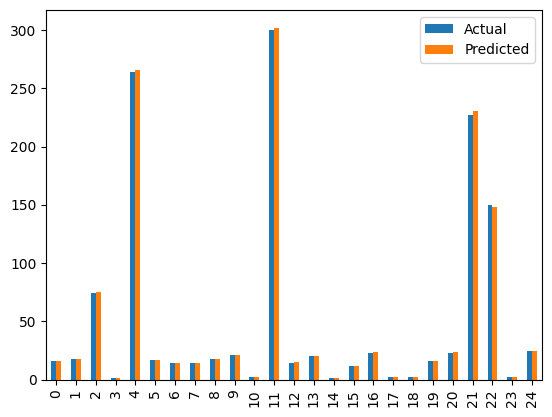

In [ ]:
graph.plot(kind = 'bar')